In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns



In [2]:
df1=pd.read_excel('/content/combine_19_20_21_sale.xlsx')

In [3]:
df1.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [4]:
df1=df1.drop(['Unnamed: 0','Zip_income','Avg_Sales'],axis=1)

In [5]:
df1

,Created Date,TMAX,Completed_Jobs,tech_count,Income
0,2019-01-03,68,90,42,100885.00
1,2019-01-04,69,85,46,25694.20
2,2019-01-05,53,82,22,92705.00
3,2019-01-06,58,16,12,14062.00
4,2019-01-07,60,89,63,109814.00
...,...,...,...,...,...
721,2021-04-30,81,222,126,210099.11
722,2021-05-01,68,168,75,119775.95
723,2021-05-05,69,202,124,230699.43
724,2021-05-08,68,109,75,112431.95


In [6]:
df1=df1.drop_duplicates(ignore_index=True)

In [7]:
df1.dtypes

Created Date      datetime64[ns]
TMAX                       int64
Completed_Jobs             int64
tech_count                 int64
Income                   float64
dtype: object

In [8]:
train_dates=pd.to_datetime(df1['Created Date'])

In [9]:
df1

,Created Date,TMAX,Completed_Jobs,tech_count,Income
0,2019-01-03,68,90,42,100885.00
1,2019-01-04,69,85,46,25694.20
2,2019-01-05,53,82,22,92705.00
3,2019-01-06,58,16,12,14062.00
4,2019-01-07,60,89,63,109814.00
...,...,...,...,...,...
719,2021-04-30,81,222,126,210099.11
720,2021-05-01,68,168,75,119775.95
721,2021-05-05,69,202,124,230699.43
722,2021-05-08,68,109,75,112431.95


In [10]:
df1=df1.drop_duplicates(ignore_index=True)

In [11]:
cols=list(df1)[1:5]


In [12]:
list(df1)[1:5]

['TMAX', 'Completed_Jobs', 'tech_count', 'Income']

In [13]:
df_for_training=df1[cols].astype(float)

In [14]:
df_for_training

,TMAX,Completed_Jobs,tech_count,Income
0,68.0,90.0,42.0,100885.00
1,69.0,85.0,46.0,25694.20
2,53.0,82.0,22.0,92705.00
3,58.0,16.0,12.0,14062.00
4,60.0,89.0,63.0,109814.00
...,...,...,...,...
719,81.0,222.0,126.0,210099.11
720,68.0,168.0,75.0,119775.95
721,69.0,202.0,124.0,230699.43
722,68.0,109.0,75.0,112431.95


In [15]:
scaler=MinMaxScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled=scaler.transform(df_for_training)

In [16]:
df_for_training.shape

(724, 4)

In [17]:
df_for_training_scaled

array([[0.26865672, 0.40271493, 0.328     , 0.24734885],
       [0.28358209, 0.3800905 , 0.36      , 0.06299679],
       [0.04477612, 0.36651584, 0.168     , 0.22729321],
       ...,
       [0.28358209, 0.90950226, 0.984     , 0.5656266 ],
       [0.26865672, 0.48868778, 0.592     , 0.27565955],
       [0.19402985, 0.79638009, 0.904     , 0.48964366]])

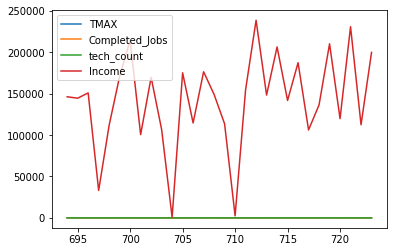

In [18]:
df_plot=df_for_training.tail(30)
df_plot.plot()

In [19]:
a=df_for_training_scaled[0:600]
b=df_for_training_scaled[600:]

In [25]:
trainX=[]
trainY=[]

In [26]:
n_future=1
n_past=5

In [27]:
df_for_training.shape[1]

4

In [28]:
for i in range(n_past,len(a)-n_future+1):
  trainX.append(a[i-n_past:i,0:a.shape[1]])
  trainY.append(a[i+n_future-1:i+n_future,3])


In [29]:
testX=[]
testY=[]

In [30]:
for i in range(n_past,len(b)-n_future+1):
  testX.append(b[i-n_past:i,0:b.shape[1]])
  testY.append(b[i+n_future-1:i+n_future,3])



In [31]:
trainX,trainY = np.array(trainX),np.array(trainY)

In [32]:
testX,testY = np.array(testX),np.array(testY)

In [33]:
trainX.shape

(595, 5, 4)

In [34]:
testX.shape

(119, 5, 4)

In [ ]:
trainY.shape

(719, 1)

In [ ]:
trainY

array([[1.64425387e-01],
       [1.20105847e-01],
       [2.43668718e-01],
       [1.17037064e-01],
       [1.30991795e-01],
       [1.44655622e-03],
       [1.22471824e-01],
       [1.64065759e-01],
       [1.50510497e-01],
       [3.52503685e-01],
       [1.35721299e-01],
       [4.86189997e-03],
       [1.79949142e-01],
       [1.04839775e-01],
       [2.37303870e-01],
       [1.39090058e-01],
       [1.46697963e-01],
       [2.09311782e-01],
       [5.68815327e-04],
       [1.58500881e-01],
       [2.15894838e-01],
       [1.14963830e-01],
       [2.38146796e-01],
       [1.84742392e-02],
       [1.12250311e-01],
       [1.83215785e-01],
       [2.13850536e-01],
       [1.79898145e-01],
       [1.25388596e-01],
       [1.73069419e-01],
       [1.49976007e-01],
       [2.08666103e-01],
       [1.83572888e-01],
       [2.39684559e-01],
       [2.73632904e-01],
       [1.84287585e-01],
       [2.15582480e-01],
       [2.36461313e-01],
       [1.56391851e-01],
       [3.10161268e-01],


In [35]:
from keras.layers import Dropout
from keras.layers import Bidirectional

In [36]:
(trainX.shape[1],trainX.shape[2])

(5, 4)

In [37]:
import tensorflow as tf

In [38]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32,return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [39]:
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanSquaredError()])

In [40]:
history=model.fit(trainX,trainY,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 100ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 4/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 6/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 7/100
15/15 [========

In [ ]:
n_future=30
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [41]:
forecast = model.predict(testX) #forecast 


In [42]:
forecast

array([[0.24636704],
       [0.21731922],
       [0.27318317],
       [0.26044875],
       [0.2523659 ],
       [0.25246212],
       [0.21045655],
       [0.18251029],
       [0.31910932],
       [0.31530404],
       [0.2806606 ],
       [0.25957698],
       [0.19662926],
       [0.15432492],
       [0.2601552 ],
       [0.2423911 ],
       [0.26773256],
       [0.26400387],
       [0.25204828],
       [0.23731269],
       [0.19979557],
       [0.15121165],
       [0.2781496 ],
       [0.34151256],
       [0.3530175 ],
       [0.29991305],
       [0.238557  ],
       [0.27155787],
       [0.27463025],
       [0.29053915],
       [0.27910456],
       [0.22210893],
       [0.33347684],
       [0.3574276 ],
       [0.34934753],
       [0.39171943],
       [0.34037542],
       [0.31516582],
       [0.3132438 ],
       [0.2680432 ],
       [0.35799637],
       [0.35478702],
       [0.32855648],
       [0.48364186],
       [0.36230263],
       [0.43460625],
       [0.38116375],
       [0.363

In [ ]:
train_dates

0     2019-01-03
1     2019-01-04
2     2019-01-05
3     2019-01-06
4     2019-01-07
         ...    
719   2021-04-30
720   2021-05-01
721   2021-05-05
722   2021-05-08
723   2021-05-13
Name: Created Date, Length: 724, dtype: datetime64[ns]

In [ ]:
forecast_period_dates

[Timestamp('2021-05-13 00:00:00', freq='D'),
 Timestamp('2021-05-14 00:00:00', freq='D'),
 Timestamp('2021-05-15 00:00:00', freq='D'),
 Timestamp('2021-05-16 00:00:00', freq='D'),
 Timestamp('2021-05-17 00:00:00', freq='D'),
 Timestamp('2021-05-18 00:00:00', freq='D'),
 Timestamp('2021-05-19 00:00:00', freq='D'),
 Timestamp('2021-05-20 00:00:00', freq='D'),
 Timestamp('2021-05-21 00:00:00', freq='D'),
 Timestamp('2021-05-22 00:00:00', freq='D'),
 Timestamp('2021-05-23 00:00:00', freq='D'),
 Timestamp('2021-05-24 00:00:00', freq='D'),
 Timestamp('2021-05-25 00:00:00', freq='D'),
 Timestamp('2021-05-26 00:00:00', freq='D'),
 Timestamp('2021-05-27 00:00:00', freq='D'),
 Timestamp('2021-05-28 00:00:00', freq='D'),
 Timestamp('2021-05-29 00:00:00', freq='D'),
 Timestamp('2021-05-30 00:00:00', freq='D'),
 Timestamp('2021-05-31 00:00:00', freq='D'),
 Timestamp('2021-06-01 00:00:00', freq='D'),
 Timestamp('2021-06-02 00:00:00', freq='D'),
 Timestamp('2021-06-03 00:00:00', freq='D'),
 Timestamp

In [ ]:
trainX[-n_future:]

array([[[0.11940299, 0.56108597, 0.752     , 0.48833448],
        [0.2238806 , 0.66968326, 0.656     , 0.26435459],
        [0.14925373, 0.3438914 , 0.416     , 0.28681777],
        [0.25373134, 0.04072398, 0.312     , 0.12830267],
        [0.20895522, 0.63800905, 0.808     , 0.11131407]],

       [[0.2238806 , 0.66968326, 0.656     , 0.26435459],
        [0.14925373, 0.3438914 , 0.416     , 0.28681777],
        [0.25373134, 0.04072398, 0.312     , 0.12830267],
        [0.20895522, 0.63800905, 0.808     , 0.11131407],
        [0.11940299, 0.71945701, 0.824     , 0.35840267]],

       [[0.14925373, 0.3438914 , 0.416     , 0.28681777],
        [0.25373134, 0.04072398, 0.312     , 0.12830267],
        [0.20895522, 0.63800905, 0.808     , 0.11131407],
        [0.11940299, 0.71945701, 0.824     , 0.35840267],
        [0.34328358, 0.65158371, 0.848     , 0.35418946]],

       [[0.25373134, 0.04072398, 0.312     , 0.12830267],
        [0.20895522, 0.63800905, 0.808     , 0.11131407],
        

In [43]:
forecast

array([[0.24636704],
       [0.21731922],
       [0.27318317],
       [0.26044875],
       [0.2523659 ],
       [0.25246212],
       [0.21045655],
       [0.18251029],
       [0.31910932],
       [0.31530404],
       [0.2806606 ],
       [0.25957698],
       [0.19662926],
       [0.15432492],
       [0.2601552 ],
       [0.2423911 ],
       [0.26773256],
       [0.26400387],
       [0.25204828],
       [0.23731269],
       [0.19979557],
       [0.15121165],
       [0.2781496 ],
       [0.34151256],
       [0.3530175 ],
       [0.29991305],
       [0.238557  ],
       [0.27155787],
       [0.27463025],
       [0.29053915],
       [0.27910456],
       [0.22210893],
       [0.33347684],
       [0.3574276 ],
       [0.34934753],
       [0.39171943],
       [0.34037542],
       [0.31516582],
       [0.3132438 ],
       [0.2680432 ],
       [0.35799637],
       [0.35478702],
       [0.32855648],
       [0.48364186],
       [0.36230263],
       [0.43460625],
       [0.38116375],
       [0.363

In [45]:
df_for_training.shape[1]

4

In [46]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,3]

In [47]:

scaler.inverse_transform(forecast_copies)


array([[6.65065918e+01, 5.54471169e+01, 3.17958775e+01, 1.00484555e+05],
       [6.45603867e+01, 4.90275459e+01, 2.81649036e+01, 8.86369531e+04],
       [6.83032761e+01, 6.13734779e+01, 3.51478958e+01, 1.11421914e+05],
       [6.74500656e+01, 5.85591736e+01, 3.35560913e+01, 1.06227992e+05],
       [6.69085159e+01, 5.67728615e+01, 3.25457344e+01, 1.02931273e+05],
       [6.69149628e+01, 5.67941284e+01, 3.25577621e+01, 1.02970523e+05],
       [6.41005859e+01, 4.75108986e+01, 2.73070698e+01, 8.58379141e+04],
       [6.22281876e+01, 4.13347740e+01, 2.38137856e+01, 7.44396016e+04],
       [7.13803253e+01, 7.15231628e+01, 4.08886642e+01, 1.30153602e+05],
       [7.11253662e+01, 7.06821899e+01, 4.04130020e+01, 1.28601555e+05],
       [6.88042603e+01, 6.30259933e+01, 3.60825729e+01, 1.14471703e+05],
       [6.73916626e+01, 5.83665123e+01, 3.34471207e+01, 1.05872422e+05],
       [6.31741600e+01, 4.44550667e+01, 2.55786572e+01, 8.01982422e+04],
       [6.03397713e+01, 3.51058083e+01, 2.02906151e

In [48]:
y_pred_future

array([100484.555,  88636.95 , 111421.914, 106227.99 , 102931.27 ,
       102970.52 ,  85837.914,  74439.6  , 130153.6  , 128601.555,
       114471.7  , 105872.42 ,  80198.24 ,  62943.77 , 106108.266,
        98862.9  , 109198.805, 107678.   , 102801.734,  96791.59 ,
        81489.67 ,  61673.977, 113447.555, 139291.11 , 143983.58 ,
       122324.11 ,  97299.11 , 110759.016, 112012.13 , 118500.82 ,
       113837.05 ,  90590.516, 136013.61 , 145782.3  , 142486.72 ,
       159768.73 , 138827.3  , 128545.18 , 127761.26 , 109325.5  ,
       146014.28 , 144705.3  , 134006.77 , 197260.7  , 147770.66 ,
       177260.78 , 155463.44 , 148141.52 , 115593.19 , 133652.66 ,
       104317.125, 146913.72 , 153619.86 , 135194.11 , 175795.05 ,
       150946.73 , 157232.66 , 200127.67 , 168965.36 , 147967.81 ,
       129772.7  , 162608.44 , 171588.25 , 161841.33 , 149679.47 ,
       123131.63 , 188111.73 , 185974.33 , 181202.81 , 167720.6  ,
       148984.47 , 130600.54 , 107489.13 , 147766.77 , 155236.

In [53]:
forecast_copies_1= np.repeat(testY, df_for_training.shape[1], axis=-1)
y_original = scaler.inverse_transform(forecast_copies_1)[:,3]

In [54]:
y_original

array([6.9089170e+04, 1.2821029e+05, 1.7741042e+05, 6.8424710e+04,
       1.3040640e+05, 4.1651850e+04, 1.0295000e+02, 1.2132892e+05,
       9.4156550e+04, 9.3428490e+04, 7.3106960e+04, 6.2484030e+04,
       5.0088000e+04, 4.5289920e+04, 9.5437440e+04, 1.0067486e+05,
       5.5735080e+04, 8.6421800e+04, 8.6421800e+04, 4.1343950e+04,
       1.5788000e+04, 1.2898555e+05, 9.3402160e+04, 1.7674702e+05,
       3.2502400e+04, 5.5111850e+04, 1.3304285e+05, 8.8538890e+04,
       6.6133390e+04, 6.7090810e+04, 6.9089170e+04, 1.2907355e+05,
       1.2821029e+05, 6.5916700e+04, 2.1979491e+05, 1.7741042e+05,
       6.8424710e+04, 9.4156550e+04, 4.1651850e+04, 1.3959161e+05,
       1.2132892e+05, 9.3428490e+04, 2.0925609e+05, 6.2484030e+04,
       4.5289920e+04, 9.5437440e+04, 5.5735080e+04, 8.6421800e+04,
       1.6970471e+05, 1.5788000e+04, 9.3402160e+04, 1.7674702e+05,
       3.2502400e+04, 1.8459628e+05, 1.3453685e+05, 8.8538890e+04,
       2.2928780e+05, 6.6133390e+04, 1.3010424e+05, 3.3965630e

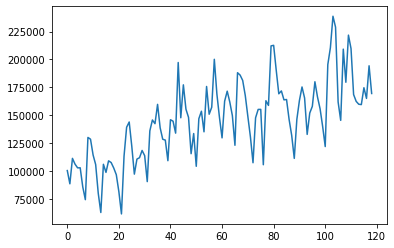

In [58]:
plt.plot(y_pred_future)
plt.show()

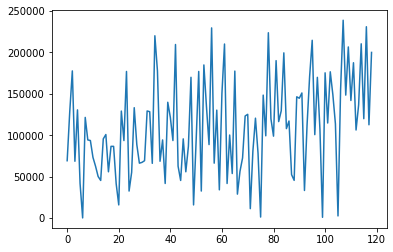

In [59]:
plt.plot(y_original)
plt.show()
